# Clustering Challenge

Clustering is an *unsupervised* machine learning technique in which you train a model to group similar entities into clusters based on their features.

In this exercise, you must separate a dataset consisting of three numeric features (**A**, **B**, and **C**) into clusters. Run the cell below to load the data.

In [1]:
import pandas as pd

data = pd.read_csv('data/clusters.csv')
data.head()

,A,B,C
0,-0.087492,0.398000,0.014275
1,-1.071705,-0.546473,0.072424
2,2.747075,2.012649,3.083964
3,3.217913,2.213772,4.260312
4,-0.607273,0.793914,-0.516091


Your challenge is to identify the number of discrete clusters present in the data, and create a clustering model that separates the data into that number of clusters. You should also visualize the clusters to evaluate the level of separation achieved by your model.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [04 - Clustering Solution.ipynb](04%20-%20Clustering%20Solution.ipynb).

In [17]:
# Your code to create a clustering solution
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [9]:
data[data.columns].values

array([[-0.08749163,  0.39800022,  0.01427456],
       [-1.07170461, -0.54647323,  0.07242446],
       [ 2.74707498,  2.01264947,  3.08396416],
       ...,
       [ 2.42257081,  1.77178025,  1.72973163],
       [-0.23744016, -0.02927841,  0.07729834],
       [ 2.40230206,  2.16613646,  2.26343446]])

In [12]:
scaled_features= MinMaxScaler().fit_transform(data[data.columns].values)

#implenting PCA 
features2d=PCA(n_components=2).fit_transform(scaled_features)
features2d

array([[ 0.38631524, -0.05515159],
       [ 0.5679739 , -0.06144958],
       [-0.2979762 ,  0.08474023],
       ...,
       [-0.13072154,  0.0767816 ],
       [ 0.43722666, -0.02364599],
       [-0.21179279,  0.02825676]])

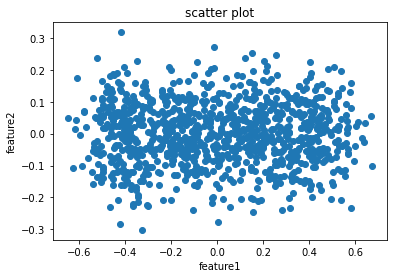

In [16]:
#Ploting the data
plt.scatter(features2d[:,0],features2d[:,1])
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.title('scatter plot')
plt.show()

In [18]:
model=KMeans(n_clusters=3,init='k-means++',n_init=100,max_iter=1000)

In [20]:
km_cluster=model.fit_predict(features2d)

In [24]:
#converting in dataframe 
df= pd.DataFrame(zip(features2d[:,0],features2d[:,1],km_cluster),columns=['feature1','feature2','class'])
df

,feature1,feature2,class
0,0.386315,-0.055152,2
1,0.567974,-0.061450,2
2,-0.297976,0.084740,1
3,-0.460522,0.114605,1
4,0.441347,-0.160347,2
...,...,...,...
995,0.003816,-0.101153,0
996,-0.534022,-0.029062,1
997,-0.130722,0.076782,0
998,0.437227,-0.023646,2


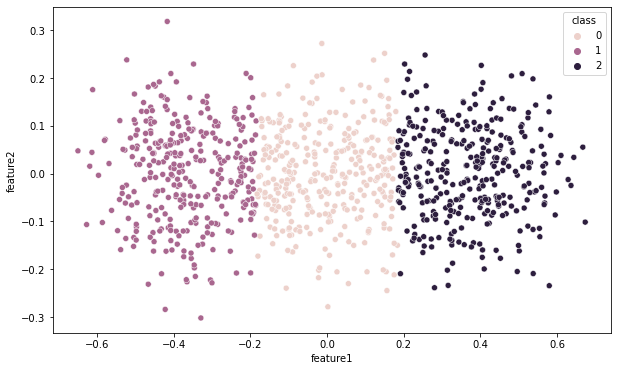

In [27]:
#plotting again 
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='feature1',y='feature2',hue='class')
plt.show()

In [31]:
# Agglometric Clustering 
from sklearn.cluster import AgglomerativeClustering

agg_model=AgglomerativeClustering(n_clusters=3)
agg_cluster=agg_model.fit_predict(features2d)


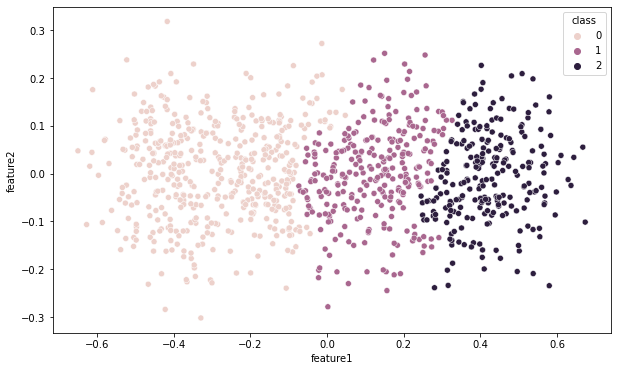

In [32]:
#plotting 
df= pd.DataFrame(zip(features2d[:,0],features2d[:,1],agg_cluster),columns=['feature1','feature2','class'])
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='feature1',y='feature2',hue='class')
plt.show()